**Multi Layer Perceptron : Multiclass Classification**

Step to Complete:
- Load & preprocess data.
- One-hot encode labels.
- Normalize features.
- Build MLP (4-10-3).
- Train using forward + backprop + gradient descent.
- Predict & evaluate accuracy.
- Confusion matrix to visualize performance.
- Analyze feature importance.
- Plot class-wise scatter plot.

Epoch 0 | Loss = 1.1095
Epoch 500 | Loss = 0.0541
Epoch 1000 | Loss = 0.0472
Epoch 1500 | Loss = 0.0438
Epoch 2000 | Loss = 0.0416
Epoch 2500 | Loss = 0.0402

Test Accuracy: 0.9666666666666667


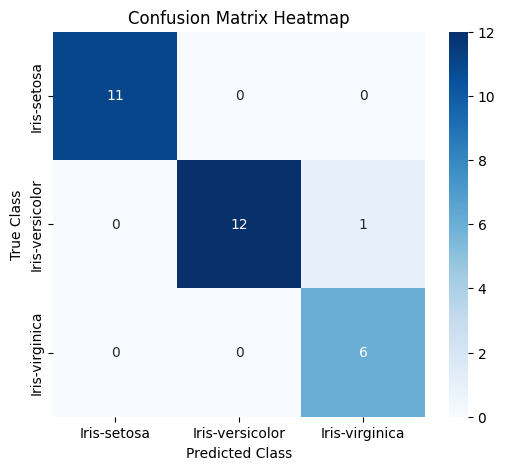


Feature Importance Scores:
sepal_length: 0.1197
sepal_width: 0.2137
petal_length: 0.3452
petal_width: 0.3214

Most Dominant Feature: petal_length


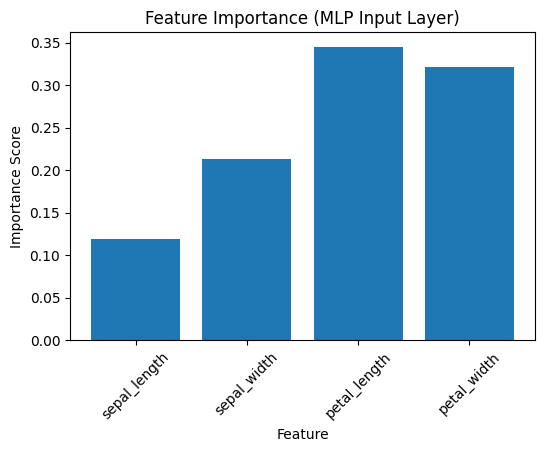

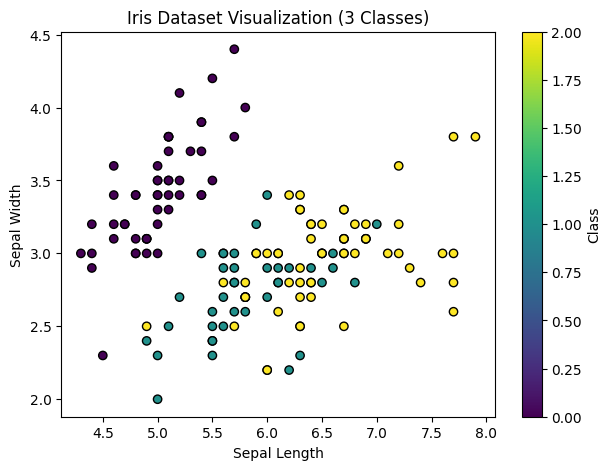

In [2]:
# @title Multi Layer Perceptron : Multiclass Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# -------------1. Load Dataset----------
df = pd.read_csv("IRIS.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)

# encode labels
enc = OneHotEncoder(sparse_output=False)
y_onehot = enc.fit_transform(y)

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=1 #random_state=1 ensures reproducibility.
)

# --------2. Network Architecture-----------
input_dim = X_train.shape[1]   # Input layer: 4 neurons
hidden_dim = 10 # Hidden layer: 10 neurons
output_dim = 3 # Output layer: 3 neurons (classes)
lr = 0.01
# Initialize weights
W1 = np.random.randn(input_dim, hidden_dim) * 0.1
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.1
b2 = np.zeros((1, output_dim))

# ------ 3. Activation Functions --------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy(actual, pred):
    return -np.mean(np.sum(actual * np.log(pred + 1e-9), axis=1))

# --------- 4. Training Loop --------
epochs = 3000
for epoch in range(epochs):

    # Forward Pass
     # Input → Hidden → Activation (sigmoid) → Output → softmax.
    z1 = X_train.dot(W1) + b1
    a1 = sigmoid(z1)

    z2 = a1.dot(W2) + b2
    y_pred = softmax(z2)

    # Loss
    loss = cross_entropy(y_train, y_pred)

    # Backpropagation
    d_z2 = y_pred - y_train
    d_W2 = a1.T.dot(d_z2)
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = d_z2.dot(W2.T)
    d_z1 = d_a1 * sigmoid_deriv(a1)

    d_W1 = X_train.T.dot(d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    # Gradient update
    W1 -= lr * d_W1
    b1 -= lr * d_b1
    W2 -= lr * d_W2
    b2 -= lr * d_b2

    if epoch % 500 == 0:
        print(f"Epoch {epoch} | Loss = {loss:.4f}")

# ---------- 5. Prediction Function -----------
def predict(x):
    a1 = sigmoid(x.dot(W1) + b1)
    y_out = softmax(a1.dot(W2) + b2)
    return np.argmax(y_out, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
y_pred_test = predict(X_test)

accuracy = np.mean(y_pred_test == y_test_labels)
print("\nTest Accuracy:", accuracy)

# ------- 6. Confusion Matrix --------
cm = confusion_matrix(y_test_labels, y_pred_test)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=enc.categories_[0],
            yticklabels=enc.categories_[0])
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix Heatmap")
plt.show()

# -------- 7. Feature Importance (Input → Hidden Weights) ------
feature_importance = np.sum(np.abs(W1), axis=1)
feature_importance = feature_importance / np.sum(feature_importance)

feature_names = df.columns[:-1]

print("\nFeature Importance Scores:")
for name, score in zip(feature_names, feature_importance):
    print(f"{name}: {score:.4f}")

most_dominant = feature_names[np.argmax(feature_importance)]
print("\nMost Dominant Feature:", most_dominant)

plt.figure(figsize=(6,4))
plt.bar(feature_names, feature_importance)
plt.title("Feature Importance (MLP Input Layer)")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.show()

# --------- 8. Visualization 1: Class-wise Scatter Plot (3 Classes) ---------
plt.figure(figsize=(7,5))
plt.scatter(df["sepal_length"], df["sepal_width"],
            c=pd.Categorical(df["species"]).codes,
            cmap='viridis', edgecolor='k')

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset Visualization (3 Classes)")
plt.colorbar(label="Class")
plt.show()
